In [1]:
library(arules)
library(ggplot2)
library(dplyr)
library(tidyr)
library(ggExtra)
library(cowplot)

data <- read.csv("data_model_pwtr.csv")

Loading required package: Matrix




Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write



Attaching package: ‘dplyr’


The following objects are masked from ‘package:arules’:

    intersect, recode, setdiff, setequal, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack




In [3]:
names(data)

[1] "X"           "Ncasos"      "sars_loess"  "Ncasos_pwtr" "sars_pwtr"  
[6] "nHab"

In [2]:
n = 5
data$nHab_disc = discretize(
    data$nHab,
    method = "frequency",
    breaks = n,
    labels = seq(1,n)
)
# por si aca

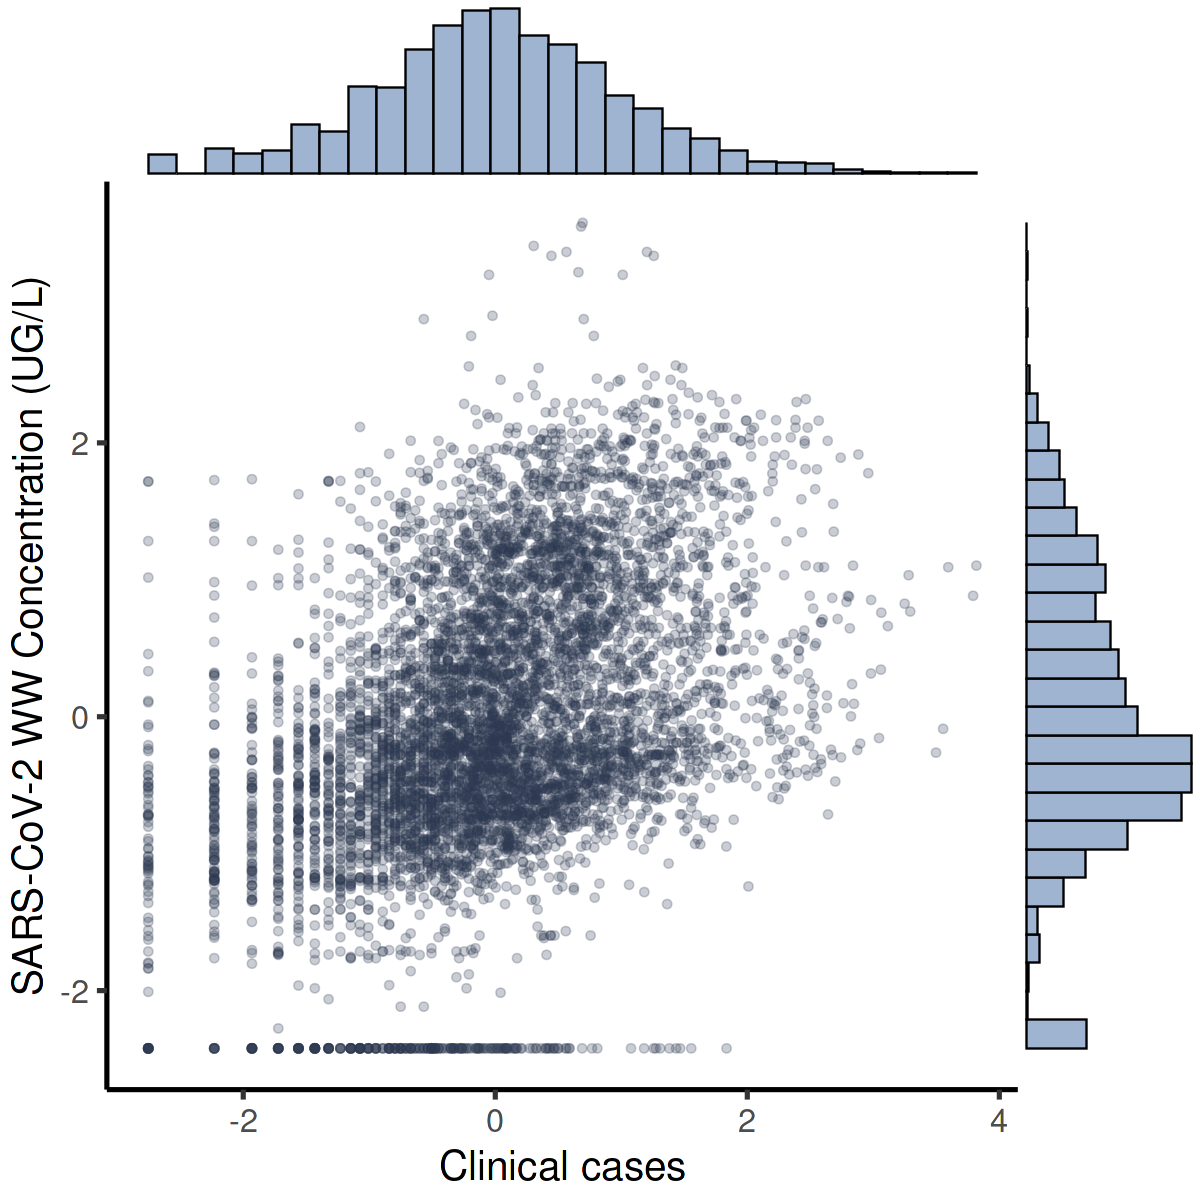

In [3]:
options(repr.plot.width = 10, repr.plot.height = 10)

ylab = "SARS-CoV-2 WW Concentration (UG/L)"
xlab = "Clinical cases"
point_color = "#2e3a50"

g1 <- ggplot(data = data, aes(x = Ncasos_pwtr, y = sars_pwtr)) +
    geom_point(alpha = .25, size = 2, fill = point_color, color = point_color, shape = 21) +
    theme_classic(base_size = 24) +
    ylab(ylab) +
    xlab(xlab)
    

nbins = 30
ggMarginal(g1, type = "histogram", fill = "#9eb4d1", xparams = list(bins = nbins), yparams = list(bins = nbins))


In [4]:
options(repr.plot.width = 22, repr.plot.height = 12)

ylab = "SARS-CoV-2 WW Concentration (UG/L)"
xlab = "Clinical cases"
point_color = "#2e3a50"
alp = .25

g1 <- ggplot(data = data, aes(x = Ncasos_pwtr, y = sars_pwtr)) +
    geom_point(alpha = alp, size = 2, fill = point_color, color = point_color, shape = 21) +
    theme_classic(base_size = 24) +
    ylab(ylab) +
    xlab(xlab)
    

nbins = 30
g1g <- ggMarginal(g1, type = "histogram", fill = "#9eb4d1", xparams = list(bins = nbins), yparams = list(bins = nbins))

g2 <- ggplot(data = data, aes(x = Ncasos, y = sars_loess)) +
    geom_point(alpha = alp, size = 2, fill = point_color, color = point_color, shape = 21) +
    theme_classic(base_size = 24) +
    ylab(ylab) +
    xlab(xlab)
    

nbins = 30
g2g <- ggMarginal(g2, type = "histogram", fill = "#9eb4d1", xparams = list(bins = nbins), yparams = list(bins = nbins))

fig_marg <- plot_grid(
    g2g,g1g,
    ncol = 2,
    nrow = 1,
    labels = c("A", "B"),
    label_size = 32
)

ggsave(filename = "./figures/marginals_test.svg", 
       plot = fig_marg)

Saving 6.67 x 6.67 in image


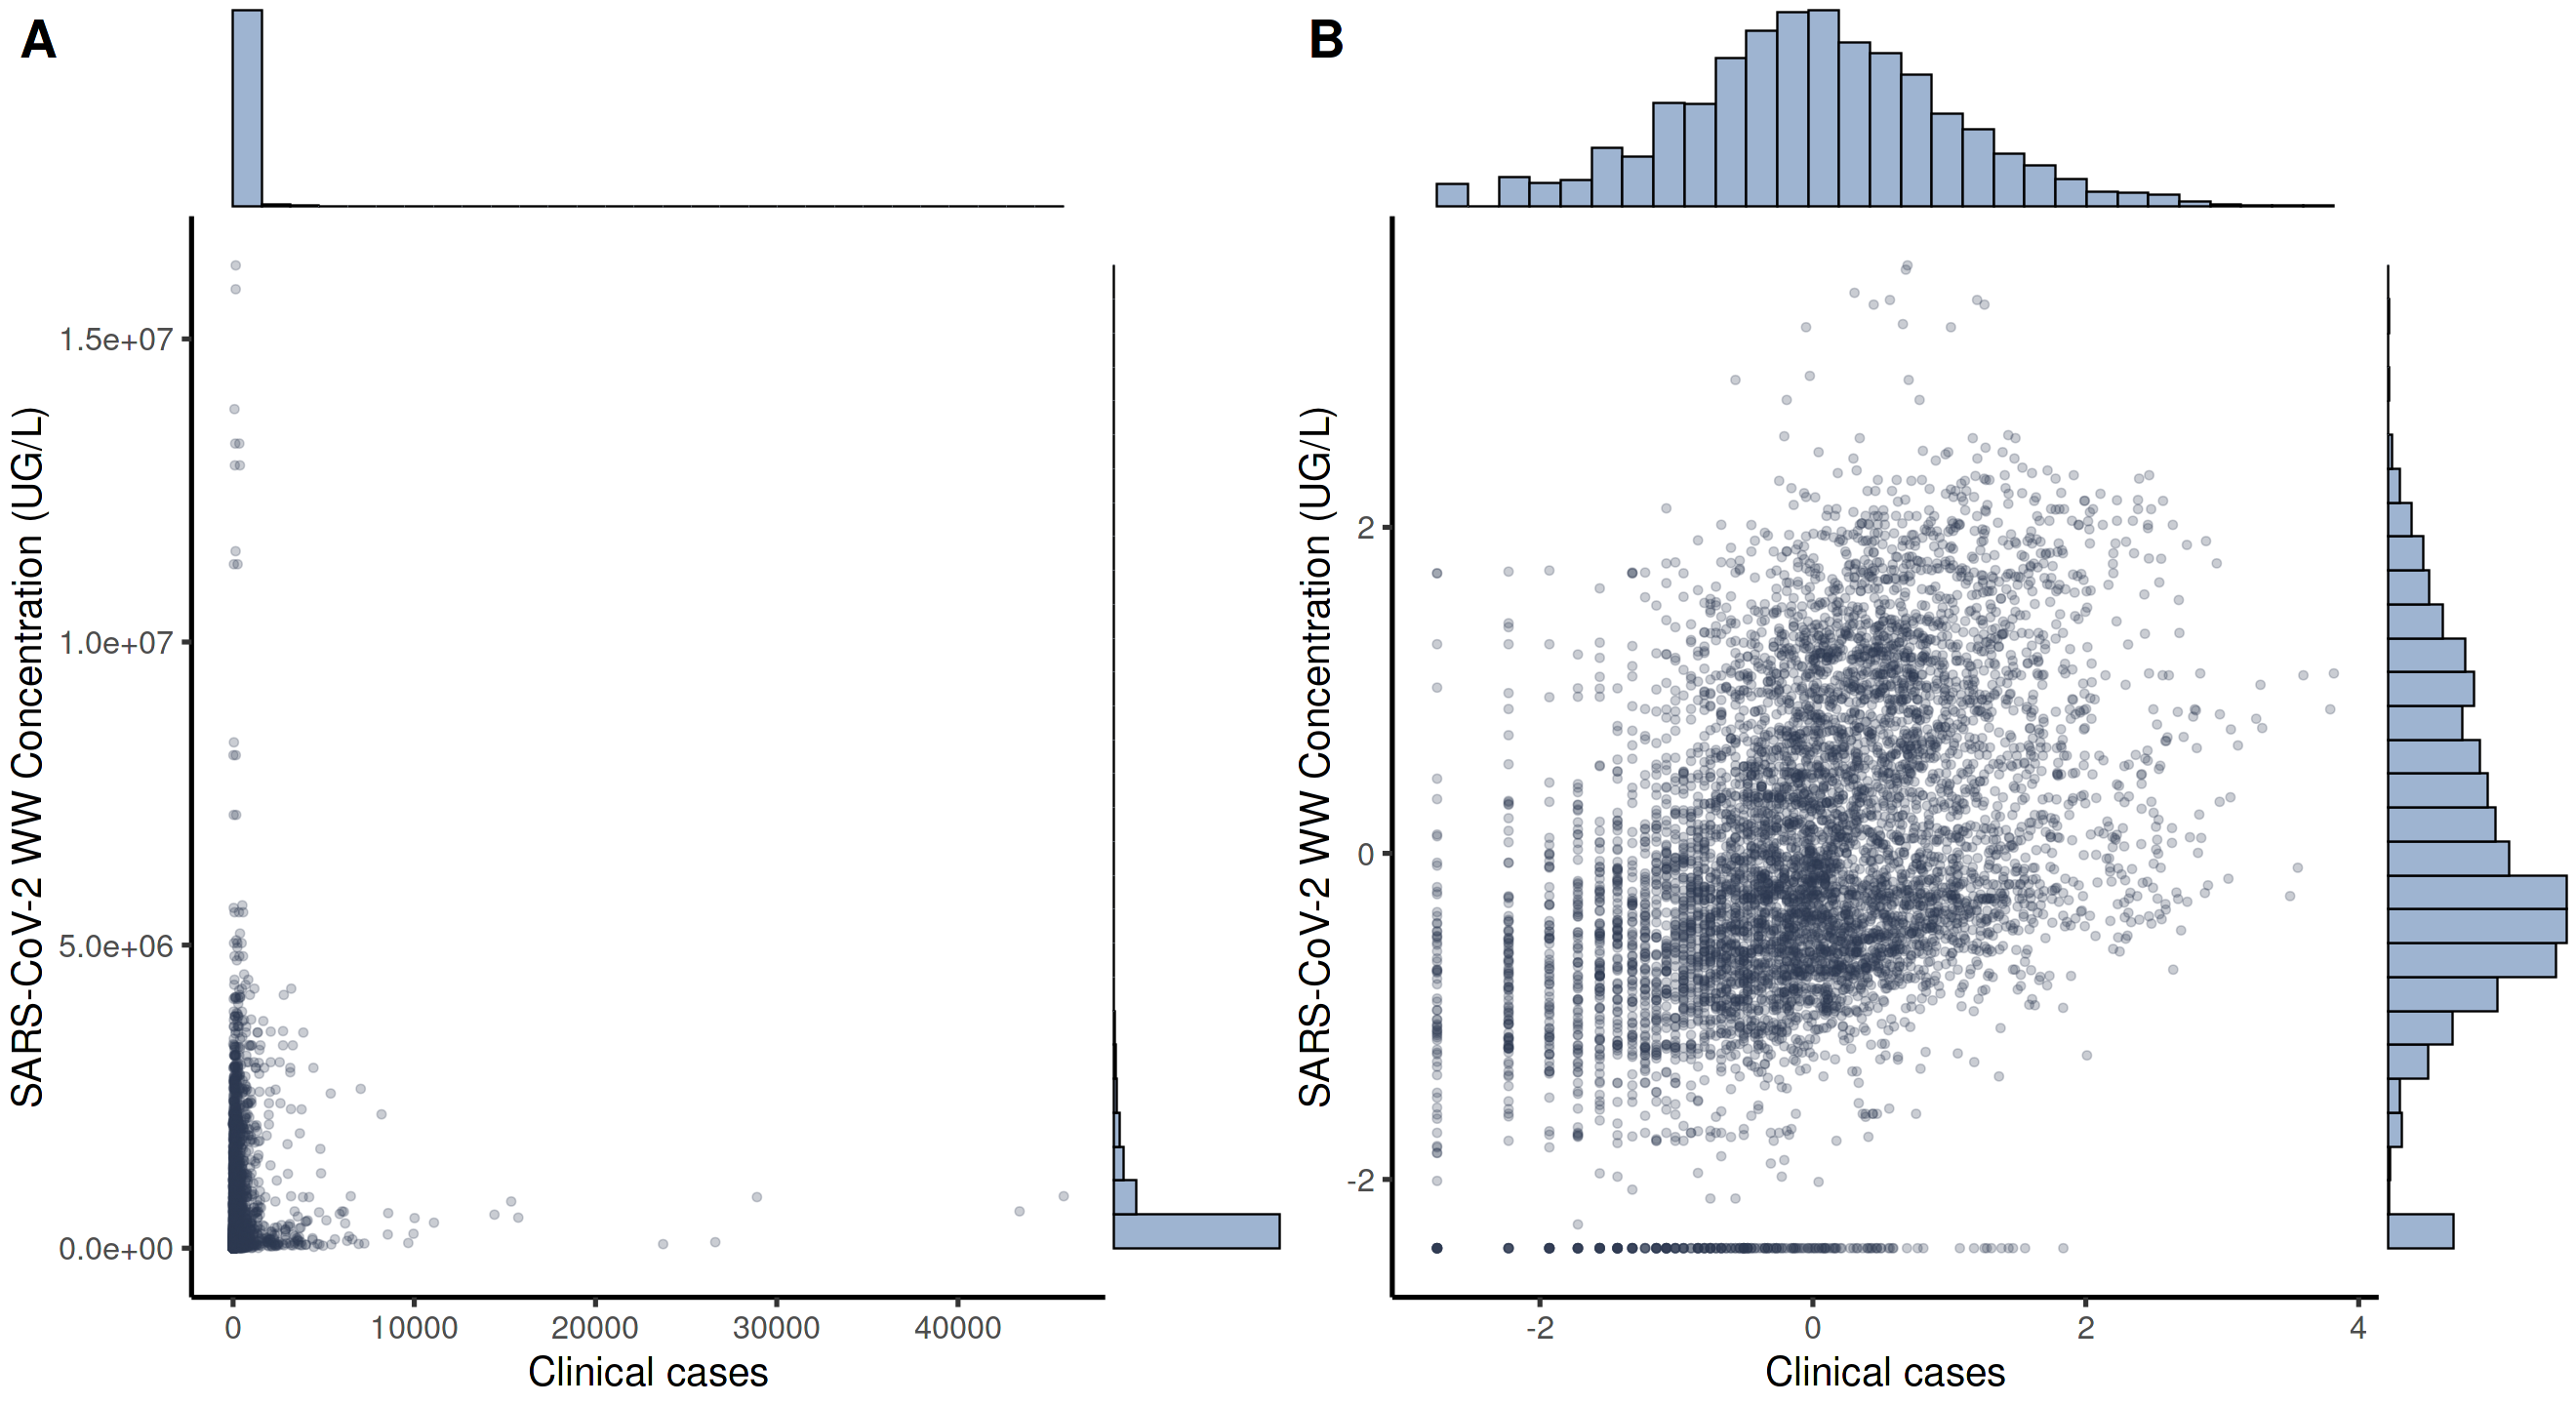

In [5]:
fig_marg

In [12]:
shapiro.test(sample(data$Ncasos_pwtr,size = 2000))
shapiro.test(sample(data$sars_pwtr,size = 2000))

shapiro.test(sample(data$Ncasos,size = 50))
shapiro.test(sample(data$sars_loess,size = 50))


	Shapiro-Wilk normality test

data:  sample(data$Ncasos_pwtr, size = 2000)
W = 0.99583, p-value = 2.403e-05



	Shapiro-Wilk normality test

data:  sample(data$sars_pwtr, size = 2000)
W = 0.98123, p-value = 1.479e-15



	Shapiro-Wilk normality test

data:  sample(data$Ncasos, size = 50)
W = 0.39168, p-value = 4.269e-13



	Shapiro-Wilk normality test

data:  sample(data$sars_loess, size = 50)
W = 0.55888, p-value = 5.003e-11


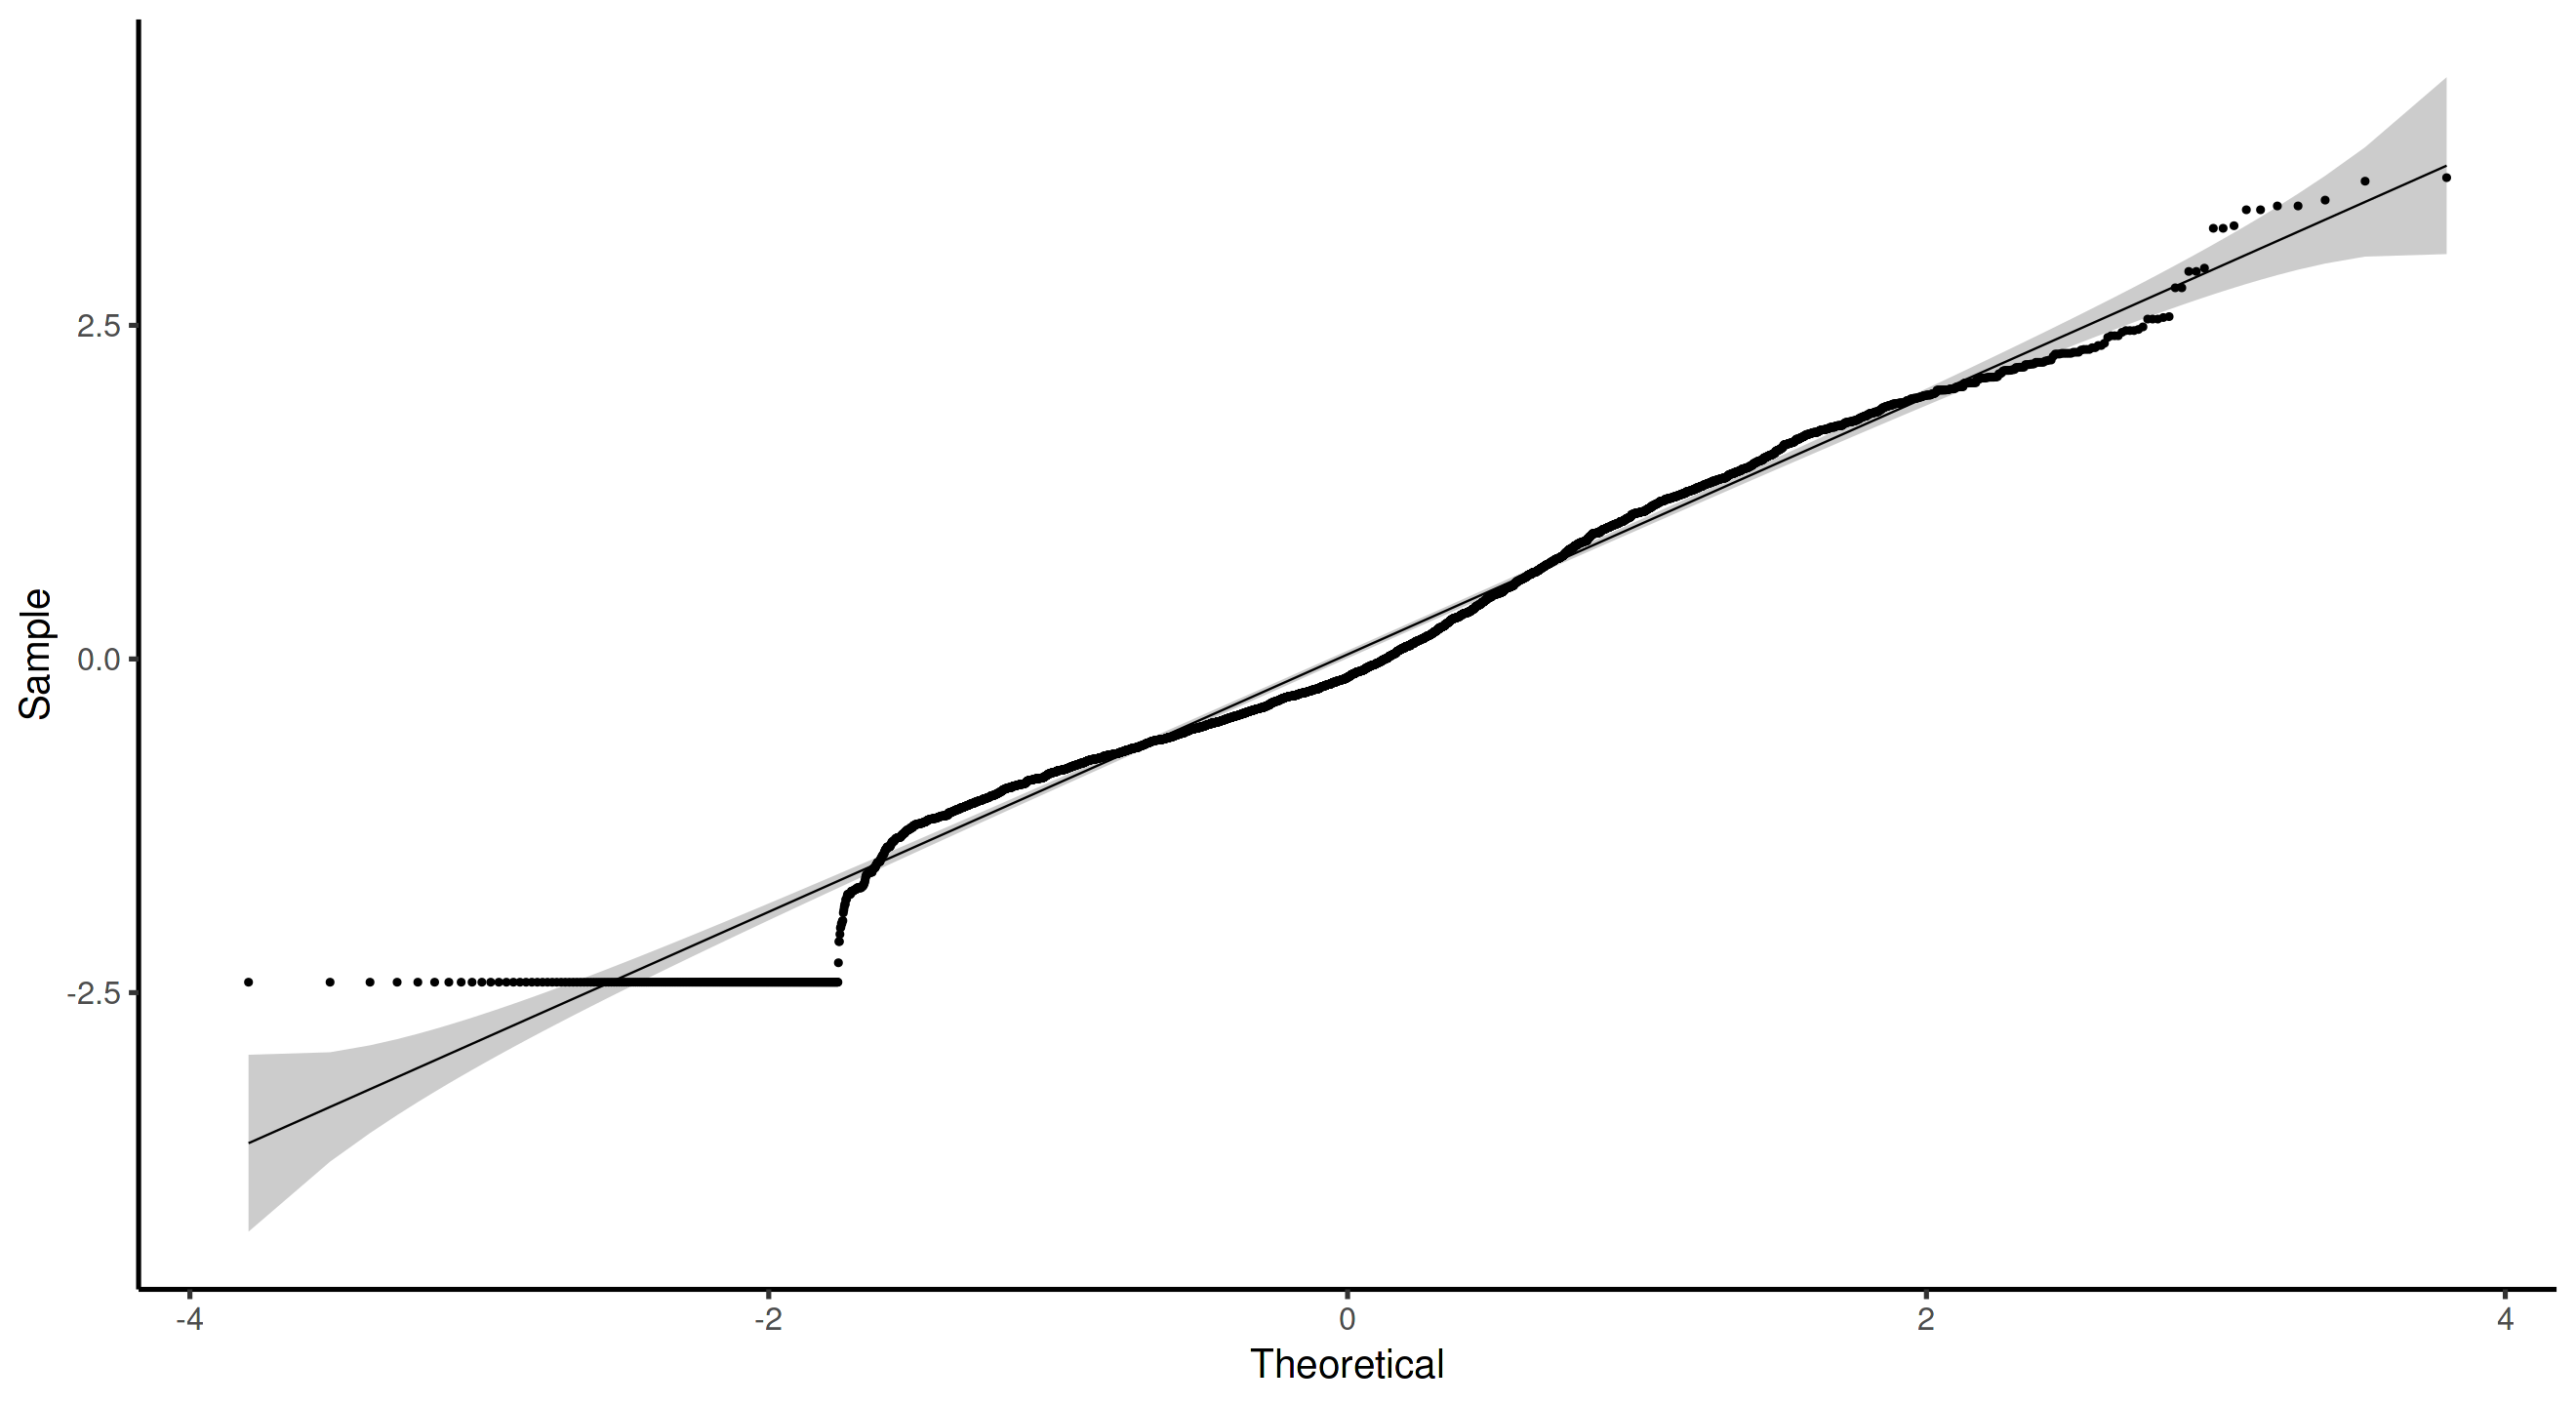

In [23]:
library(ggpubr)

ggqqplot(data$sars_pwtr) +
  theme_classic(base_size = 24)

In [27]:
library(nortest)
ad.test(data$sars_pwtr)


	Anderson-Darling normality test

data:  data$sars_pwtr
A = 38.372, p-value < 2.2e-16
